In [1]:
import sqlite3

In [2]:
connection = sqlite3.connect('employee.db')

In [3]:
connection

In [4]:
table_creation_query = ''' 
CREATE TABLE IF NOT EXISTS employees (
    emp_id INTEGER PRIMARY KEY,
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL,
    email TEXT UNIQUE NOT NULL,
    hire_date TEXT NOT NULL,
    salary REAL NOT NULL
);
'''

In [5]:
table_creation_query2 = ''' 
CREATE TABLE IF NOT EXISTS customers (
        customer_id INTEGER PRIMARY KEY AUTOINCREMENT,
        first_name TEXT NOT NULL,
        last_name TEXT NOT NULL,
        email TEXT UNIQUE NOT NULL,
        phone TEXT
    );
'''

In [6]:
table_creation_query3 = ''' 
    CREATE TABLE IF NOT EXISTS orders (
        order_id INTEGER PRIMARY KEY AUTOINCREMENT,
        customer_id INTEGER,
        order_date TEXT NOT NULL,
        amount REAL NOT NULL,
        FOREIGN KEY (customer_id) REFERENCES customers(customer_id)
    );
'''

In [7]:
cursor = connection.cursor()

In [8]:
cursor.execute(table_creation_query)

In [9]:
cursor.execute(table_creation_query2)

In [10]:
cursor.execute(table_creation_query3)

In [11]:
insert_query = """
INSERT INTO employees (emp_id, first_name, last_name, email, hire_date, salary)
VALUES (?, ?, ?, ?, ?, ?);
"""

In [12]:
insert_query_customers = """
INSERT INTO customers (customer_id, first_name, last_name, email, phone)
VALUES (?, ?, ?, ?, ?);
"""

In [13]:
insert_query_orders = """
INSERT INTO orders (order_id, customer_id, order_date, amount)
VALUES (?, ?, ?, ?);
"""

In [14]:
employee_data = [
    (1, "Hello", "World", "world.v@abc.com", "2023-06-01", 50000.00),
    (2, "Arhun", "Meheta", "arhun.m@gmail.com", "2022-04-15", 60000.00),
    (3, "Alice", "Johnson", "alice.johnson@jpg.com", "2021-09-30", 55000.00),
    (4, "Bob", "Brown", "bob.brown@uio.com", "2020-01-20", 45000.00),
    ]

In [15]:
customers_data = [
    (1, "John", "Doe", "john.doe@example.com", "1234567890"),
    (2, "Jane", "Smith", "jane.smith@example.com", "9876543210"),
    (3, "Emily", "Davis", "emily.davis@example.com", "4567891230"),
    (4, "Michael", "Brown", "michael.brown@example.com", "7894561230"),
]

In [16]:
orders_data = [
    (1, 1, "2023-12-01", 250.75),
    (2, 2, "2023-11-20", 150.50),
    (3, 3, "2023-11-25", 300.00),
    (4, 4, "2023-12-02", 450.00),
]

In [17]:
cursor.executemany(insert_query, employee_data)

In [18]:
cursor.executemany(insert_query_customers, customers_data)

In [19]:
cursor.executemany(insert_query_orders, orders_data)

In [20]:
connection.commit()

In [21]:
cursor.execute("SELECT * FROM employees;")

In [22]:
for row in cursor.fetchall():
    print(row) 

(1, 'Hello', 'World', 'world.v@abc.com', '2023-06-01', 50000.0)
(2, 'Arhun', 'Meheta', 'arhun.m@gmail.com', '2022-04-15', 60000.0)
(3, 'Alice', 'Johnson', 'alice.johnson@jpg.com', '2021-09-30', 55000.0)
(4, 'Bob', 'Brown', 'bob.brown@uio.com', '2020-01-20', 45000.0)


In [25]:
import os 
from dotenv import load_dotenv
load_dotenv()

True

In [26]:
GROQ_API_KEY = os.getenv("GROQ_API_KEY")
os.environ["GROQ_API_KEY"] = GROQ_API_KEY

In [27]:
from langchain_groq import ChatGroq

llm = ChatGroq(model_name = "llama-3.3-70b-versatile")

In [28]:
llm.invoke("Hi bro").content

"What's up? How can I help you today?"

Just like we implemented the SQL queries using the cursor.execute() method manually, we get a method called SQLDatabase in LangChain

In [29]:
from langchain_community.utilities import SQLDatabase
db = SQLDatabase.from_uri("sqlite:///employee.db")

In [30]:
print("Dialect: ", db.dialect)
print("Useable Tables: ", db.get_usable_table_names())

Dialect:  sqlite
Useable Tables:  ['customers', 'employees', 'orders']


In [31]:
query_result = db.run("SELECT * FROM employees;")

In [32]:
print("Query Result: ", query_result)

Query Result:  [(1, 'Hello', 'World', 'world.v@abc.com', '2023-06-01', 50000.0), (2, 'Arhun', 'Meheta', 'arhun.m@gmail.com', '2022-04-15', 60000.0), (3, 'Alice', 'Johnson', 'alice.johnson@jpg.com', '2021-09-30', 55000.0), (4, 'Bob', 'Brown', 'bob.brown@uio.com', '2020-01-20', 45000.0)]


In [33]:
from langchain_community.agent_toolkits import SQLDatabaseToolkit

In [35]:
toolkit = SQLDatabaseToolkit(db=db, llm=llm)

In [36]:
tools = toolkit.get_tools()

In [38]:
for tool in tools:
    print(tool.name,": " ,tool.description)

sql_db_query :  Input to this tool is a detailed and correct SQL query, output is a result from the database. If the query is not correct, an error message will be returned. If an error is returned, rewrite the query, check the query, and try again. If you encounter an issue with Unknown column 'xxxx' in 'field list', use sql_db_schema to query the correct table fields.
sql_db_schema :  Input to this tool is a comma-separated list of tables, output is the schema and sample rows for those tables. Be sure that the tables actually exist by calling sql_db_list_tables first! Example Input: table1, table2, table3
sql_db_list_tables :  Input is an empty string, output is a comma-separated list of tables in the database.
sql_db_query_checker :  Use this tool to double check if your query is correct before executing it. Always use this tool before executing a query with sql_db_query!


In [39]:
list_tables_tool = next((tool for tool in tools if tool.name == "sql_db_list_tables"), None)

In [40]:
list_tables_tool

ListSQLDatabaseTool(db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x111c9e6e0>)

In [43]:
get_schema_tool = next((tool for tool in tools if tool.name == "sql_db_schema"), None)

In [44]:
get_schema_tool

InfoSQLDatabaseTool(description='Input to this tool is a comma-separated list of tables, output is the schema and sample rows for those tables. Be sure that the tables actually exist by calling sql_db_list_tables first! Example Input: table1, table2, table3', db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x111c9e6e0>)

In [45]:
print(list_tables_tool.invoke(""))

customers, employees, orders


In [46]:
print(get_schema_tool.invoke("employees"))


CREATE TABLE employees (
	emp_id INTEGER, 
	first_name TEXT NOT NULL, 
	last_name TEXT NOT NULL, 
	email TEXT NOT NULL, 
	hire_date TEXT NOT NULL, 
	salary REAL NOT NULL, 
	PRIMARY KEY (emp_id), 
	UNIQUE (email)
)

/*
3 rows from employees table:
emp_id	first_name	last_name	email	hire_date	salary
1	Hello	World	world.v@abc.com	2023-06-01	50000.0
2	Arhun	Meheta	arhun.m@gmail.com	2022-04-15	60000.0
3	Alice	Johnson	alice.johnson@jpg.com	2021-09-30	55000.0
*/


In [47]:
print(get_schema_tool.invoke("orders"))


CREATE TABLE orders (
	order_id INTEGER, 
	customer_id INTEGER, 
	order_date TEXT NOT NULL, 
	amount REAL NOT NULL, 
	PRIMARY KEY (order_id), 
	FOREIGN KEY(customer_id) REFERENCES customers (customer_id)
)

/*
3 rows from orders table:
order_id	customer_id	order_date	amount
1	1	2023-12-01	250.75
2	2	2023-11-20	150.5
3	3	2023-11-25	300.0
*/


In [48]:
from langchain_core.tools import tool

@tool
def db_query_tool(query: str) -> str:
    """ 
        Execute a SQL query against the connected database and return the results as a string.
        If the query is invalid or causes an error, return the error message.
        In case of an error, the user should be informed that the query was unsuccessful and is advised to rewrite the query and try again.
    """

    result = db.run_no_throw(query)

    if not result:
        return "The query was unsuccessful. Please rewrite the query and try again."
    return str(result)

In [50]:
print(db_query_tool.invoke("SELECT * FROM orders;"))

[(1, 1, '2023-12-01', 250.75), (2, 2, '2023-11-20', 150.5), (3, 3, '2023-11-25', 300.0), (4, 4, '2023-12-02', 450.0)]


In [74]:
from typing import Annotated, Literal, Sequence, TypedDict
from langchain import hub
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field
from langgraph.graph.message import add_messages
from langgraph.prebuilt import tools_condition, ToolNode
from langchain_community.document_loaders import WebBaseLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langgraph.graph import START, END, StateGraph
from typing import Any
from langgraph.graph.message import AnyMessage
from langchain_core.prompts import ChatPromptTemplate 
from langchain_core.messages import AIMessage
from langchain_core.messages import ToolMessage
from langchain_core.runnables import RunnableLambda, RunnableWithFallbacks

In [54]:
class SubmitFinalAnswer(BaseModel):
    """ 
        Submit the final answer to the user based on the query results obtained from the database.
    """
    final_answer: str = Field(..., description="The final answer to be provided to the user.")

In [59]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [61]:
query_check_system = """ 
    You are an expert SQL Agent with very strong attention to detail.
    Double check the SQLite query for common mistakes such as:
    1. Using NOT IN with NULL values.
    2. Using UNION when UNION ALL should have been used. 
    3. Using BETWEEN for exclusive ranges.
    4. Data type mimatch in predicates.
    5. Properly quoting identifiers. 
    6. Using the correct number of arguments for functions.
    7. Casting to the correct data type. 
    8. Using the proper syntax and columns for JOINs.

    If you find any of the above mistakes in the query, you must rewrite the query. If there are no mistakes, you must return the original query.

    You will then call the appropriate tool to execute the query and get the results.
"""

In [62]:
query_check_prompt = ChatPromptTemplate.from_messages([("system", query_check_system), ("placeholder", "{messages}")])

In [63]:
query_check = query_check_prompt | llm.bind_tools([db_query_tool])

In [64]:
query_check.invoke({"messages": [("user", "Select from employees limit 5;")]})

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'tmvbetjnp', 'function': {'arguments': '{"query":"Select * from employees limit 5;"}', 'name': 'db_query_tool'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 495, 'total_tokens': 516, 'completion_time': 0.059734867, 'prompt_time': 0.040737423, 'queue_time': 0.212055552, 'total_time': 0.10047229}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_155ab82e98', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--5dacc699-891e-47cd-b898-a0de8840bc0a-0', tool_calls=[{'name': 'db_query_tool', 'args': {'query': 'Select * from employees limit 5;'}, 'id': 'tmvbetjnp', 'type': 'tool_call'}], usage_metadata={'input_tokens': 495, 'output_tokens': 21, 'total_tokens': 516})

In [66]:
query_gen_system = """ 
    You are an expert SQL Agent with very strong attention to detail.
    Given an input question, output a syntactically correct SQLite query to answer the question. Then look at the results of the query and provide a final answer to the user based on the results.
    DO NOT CALL ANY OTHER TOOL BESIDES SubmitFinalAnswer to submit the final answer to the user.

    When generating the SQL query, ensure that:
    1. Output the SQL Query such that it answers the input question accurately without a tool call and without any mistakes.
    2. Unless the user specifies a specific number of examples they wish to obtain, always limit your query to at most 5 results.
    3. You can order the results by a relevant column to return the most interesting examples in the database.
    3. Never query for all the columns from a specific table, only ask for the relevant columns given the question.

    If you get an error while executing a query, rewrite the query and try again.

    If you get an empty result set, you should try to rewrite the query to get a non-empty result set.
    NEVER make stuff up if you don't have enough information to answer the query... just say you don't have enough information.

    If you have enough information to answer the input question, simply invoke the appropriate tool to submit the final answer to the user.

    DO NOT make any DML statements (INSERT, UPDATE, DELETE, DROP etc.) to the database. Do not return any sql query except answer.
"""

In [67]:
query_gen_prompt = ChatPromptTemplate.from_messages([("system", query_gen_system), ("placeholder", "{messages}")])

In [69]:
query_gen = query_gen_prompt | llm.bind_tools([SubmitFinalAnswer])

In [71]:
def first_tool_call(state: State) -> dict:
    return {"messages": [AIMessage(content="", tool_calls=[{"name": "sql_db_list_tables", "args": {}, "id": "tool_call_1"}])]}

In [73]:
def handle_tool_error(state: State) -> dict:
    error = state.get("error")
    tool_calls = state["messages"][-1].tool_calls

    return {
        "messages": [
            ToolMessage(content=f"Error: {repr(error)} while executing tool calls: {tool_calls}. Please rewrite the query and try again.", tool_call_id=tc["id"],)
            for tc in tool_calls
        ]
    }

In [77]:
def create_tool_node_with_fallback(tools: list) -> RunnableWithFallbacks[Any, dict]:
    return ToolNode(tools).with_fallbacks([RunnableLambda(handle_tool_error)], exception_key = "error")

In [78]:
def query_gen_node(state: State):
    message = query_gen.invoke(state)

    # Sometimes, the LLM will hallucinate and call the wrong tool. We need to catch this and return an error message.
    tool_messages = []
    if message.tool_calls:
        for tc in message.tool_calls:
            if tc["name"] != "SubmitFinalAnswer":
                tool_messages.append(
                    ToolMessage(
                        content=f"Error: The wrong tool was called: {tc['name']}. Please fix your mistakes. Remember to only call SubmitFinalAnswer to submit the final answer. Generated queries should be outputted WITHOUT a tool call.",
                        tool_call_id=tc["id"],
                    )
                )
    else:
        tool_messages = []
    return {"messages": [message] + tool_messages}

In [79]:
def should_continue(state: State) -> Literal[END, "correct_query", "query_gen"]:
    messages = state["messages"]
    last_message = messages[-1]
    if getattr(last_message, "tool_calls", None):
        return END
    if last_message.content.startswith("Error:"):
        return "query_gen"
    else:
        return "correct_query"

In [80]:
def model_check_query(state: State) -> dict[str, list[AIMessage]]:
    """
    Use this tool to double-check if your query is correct before executing it.
    """
    return {"messages": [query_check.invoke({"messages": [state["messages"][-1]]})]}

In [81]:
workflow = StateGraph(State)

In [82]:
workflow.add_node("first_tool_call",first_tool_call)
workflow.add_node("list_tables_tool", create_tool_node_with_fallback([list_tables_tool]))
workflow.add_node("get_schema_tool", create_tool_node_with_fallback([get_schema_tool]))
model_get_schema = llm.bind_tools([get_schema_tool])
workflow.add_node("model_get_schema",lambda state: {"messages": [model_get_schema.invoke(state["messages"])],},)
workflow.add_node("query_gen", query_gen_node)
workflow.add_node("correct_query", model_check_query)
workflow.add_node("execute_query", create_tool_node_with_fallback([db_query_tool]))

In [83]:
workflow.add_edge(START, "first_tool_call")
workflow.add_edge("first_tool_call", "list_tables_tool")
workflow.add_edge("list_tables_tool", "model_get_schema")
workflow.add_edge("model_get_schema", "get_schema_tool")
workflow.add_edge("get_schema_tool", "query_gen")
workflow.add_conditional_edges("query_gen",should_continue,)
workflow.add_edge("correct_query", "execute_query")
workflow.add_edge("execute_query", "query_gen")

In [84]:
app = workflow.compile()

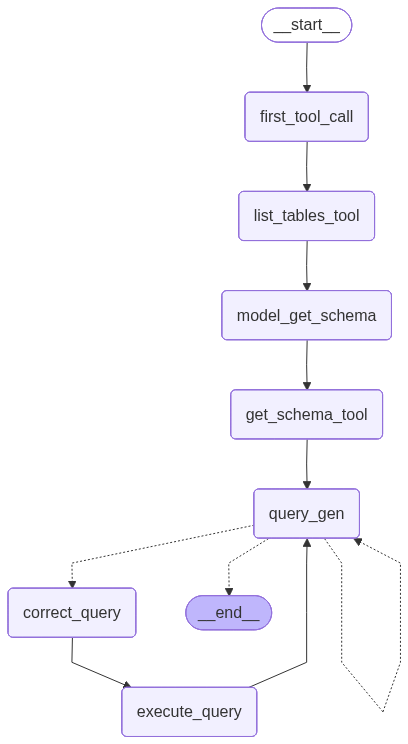

In [85]:
from IPython.display import Image, display
from langchain_core.runnables.graph import MermaidDrawMethod

display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [88]:
query={"messages": [("user", "Tell me name of the employee with highest salary?")]}

In [89]:
response=app.invoke(query)

In [90]:
response["messages"][-1].tool_calls[0]["args"]["final_answer"]

'Arhun Meheta'